# Modeling

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("final_data.csv")

From Our Analysis we see that, the best ,models to choose will be SVM, RF, GradientBoost Classifier because the data are relatively small so we may not need DL methods, also using a logistic regression are almost useless as most of the realtions are not linearly separated.

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [14]:
from sklearn.preprocessing import LabelEncoder

# Preprocessing:

### Binary Encoding:

In [23]:
import category_encoders as ce

categorical = df.select_dtypes(include = ["object"])
numerical_column = df.select_dtypes(exclude = ["object"])
ce_binary = ce.BinaryEncoder(cols = categorical.columns.to_list())

dat=ce_binary.fit_transform(categorical,numerical_column)
result = pd.concat([numerical_column, dat], axis=1)
result.head()

,campaign,previous,poutcome,y,quarter,year,euriborQ,cons_confi_Q,cons_price_Q,emp_var_Q,...,job_1,job_2,job_3,marital_0,marital_1,contact_0,contact_1,age_level_0,age_level_1,age_level_2
0,1,1,3.0,0,4,2008,4.12961,-41.970893,93.210879,-0.1,...,0,0,1,0,1,0,1,0,0,1
1,1,1,3.0,1,4,2008,4.12961,-41.970893,93.210879,-0.1,...,0,1,0,1,0,0,1,0,0,1
2,1,1,3.0,0,4,2008,4.12961,-41.970893,93.210879,-0.1,...,0,1,1,1,0,0,1,0,0,1
3,1,1,3.0,1,4,2008,4.12961,-41.970893,93.210879,-0.1,...,0,1,1,1,0,0,1,0,0,1
4,1,1,3.0,0,4,2008,4.12961,-41.970893,93.210879,-0.1,...,0,1,1,1,0,0,1,0,0,1


In [ ]:
df_encoded = 

### Splitting Data:

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(result.drop(columns = ["y"]), result["y"],
                                                    test_size = 0.1, random_state = 1)

### Normalization:

In [25]:
min_max = MinMaxScaler()

In [26]:
train_scaled = min_max.fit_transform(X_train)
test_scaled = min_max.transform(X_test)

# SVM:

In [27]:
svc = SVC()

In [37]:
param_grid = {'C': [0.1,1, 10, 100],
              'kernel': ['sigmoid']}

In [44]:
grid = GridSearchCV(svc,param_grid,verbose=4)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.888 total time=  20.5s
[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.888 total time=  20.3s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.888 total time=  20.1s
[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.888 total time=  20.4s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.887 total time=  20.6s
[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.888 total time=  21.1s
[CV 2/5] END ...............C=1, kernel=sigmoid;, score=0.888 total time=  21.6s
[CV 3/5] END ...............C=1, kernel=sigmoid;, score=0.888 total time=  21.3s
[CV 4/5] END ...............C=1, kernel=sigmoid;, score=0.888 total time=  20.8s
[CV 5/5] END ...............C=1, kernel=sigmoid;, score=0.887 total time=  20.7s
[CV 1/5] END ..............C=10, kernel=sigmoid;, score=0.888 total time=  20.8s
[CV 2/5] END ..............C=10, kernel=sigmoid;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['sigmoid']},
             verbose=4)

In [55]:
best_svm = SVC(C = 0.1, kernel = "sigmoid")

In [57]:
best_svm.fit(X_train, Y_train)

SVC(C=0.1, kernel='sigmoid')

In [58]:
svm_predict = best_svm.predict(X_test)

In [59]:
svm_confusion = confusion_matrix(Y_test, svm_predict)

In [60]:
svm_confusion

array([[3649,    0],
       [ 470,    0]])

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

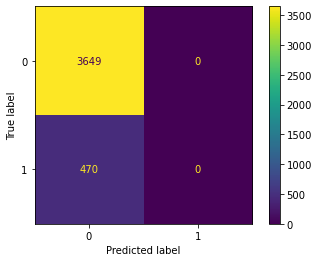

In [66]:
disp = ConfusionMatrixDisplay(svm_confusion)
disp.plot()
plt.show()

# RF:

In [45]:
RF = RandomForestClassifier()

In [46]:
param_grid = {'n_estimators': [1, 5, 10, 20],
              'max_depth': [1, 10, 50]}

In [47]:
grid = GridSearchCV(RF,param_grid,verbose=4)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......max_depth=1, n_estimators=1;, score=0.888 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators=1;, score=0.888 total time=   0.0s
[CV 3/5] END .......max_depth=1, n_estimators=1;, score=0.888 total time=   0.0s
[CV 4/5] END .......max_depth=1, n_estimators=1;, score=0.890 total time=   0.0s
[CV 5/5] END .......max_depth=1, n_estimators=1;, score=0.887 total time=   0.0s
[CV 1/5] END .......max_depth=1, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END .......max_depth=1, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END .......max_depth=1, n_estimators=5;, score=0.888 total time=   0.0s
[CV 5/5] END .......max_depth=1, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.888 total time=   0.1s
[CV 2/5] END ......max_depth=1, n_estimators=10;

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 50],
                         'n_estimators': [1, 5, 10, 20]},
             verbose=4)

In [67]:
best_RF = RandomForestClassifier(max_depth = 10, n_estimators = 20)

In [68]:
best_RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [70]:
RF_predict = best_RF.predict(X_test)

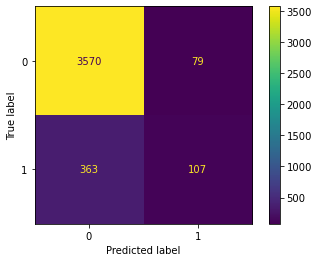

In [71]:
RF_confusion = confusion_matrix(Y_test, RF_predict)
disp = ConfusionMatrixDisplay(RF_confusion)
disp.plot()
plt.show()

# Gradient Boosting Calssifier:

In [49]:
GBC = GradientBoostingClassifier()

In [53]:
param_grid = {'n_estimators': [1, 5, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 1]}

In [54]:
grid = GridSearchCV(GBC,param_grid,verbose=4)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.001, n_estimators=1;, score=0.888 total time=   0.1s
[CV 2/5] END learning_rate=0.001, n_estimators=1;, score=0.888 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=1;, score=0.888 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=1;, score=0.888 total time=   0.0s
[CV 5/5] END learning_rate=0.001, n_estimators=1;, score=0.887 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=5;, score=0.888 total time=   0.1s
[CV 2/5] END learning_rate=0.001, n_estimators=5;, score=0.888 total time=   0.1s
[CV 3/5] END learning_rate=0.001, n_estimators=5;, score=0.888 total time=   0.1s
[CV 4/5] END learning_rate=0.001, n_estimators=5;, score=0.888 total time=   0.1s
[CV 5/5] END learning_rate=0.001, n_estimators=5;, score=0.887 total time=   0.1s
[CV 1/5] END learning_rate=0.001, n_estimators=10;, score=0.888 total time=   0.2s
[CV 2/5] END learning_rate=0.001, n_

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [1, 5, 10, 20]},
             verbose=4)

In [72]:
best_GBC = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.1)

In [73]:
best_GBC.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=20)

In [75]:
GBC_predict = best_GBC.predict(X_test)

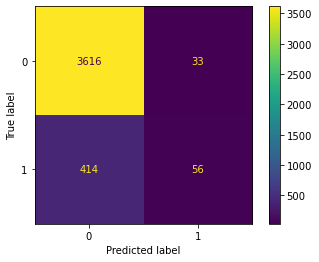

In [76]:
GBC_confusion = confusion_matrix(Y_test, GBC_predict)
disp = ConfusionMatrixDisplay(GBC_confusion)
disp.plot()
plt.show()

# Unnblanced Data:

Here We Can see that all models suffers from the unbalnaced data, so we have to deal with the unbalnced data.

In [77]:
Y_test.value_counts()

0    3649
1     470
Name: y, dtype: int64

# SMOTE Algorithm:

In [78]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [79]:
counts = Counter(df["y"])

In [81]:
print(counts)

Counter({0: 36548, 1: 4640})


In [82]:
oversample = SMOTE()

In [85]:
X, y = oversample.fit_resample(result.drop(columns = ["y"]), result["y"])

In [86]:
counts = Counter(y)

In [87]:
print(counts)

Counter({0: 36548, 1: 36548})


Now let's Train Our Algorithms more:

In [89]:
# Splittig again:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    test_size = 0.1, random_state = 1)

In [90]:
#normalizing again:
train_scaled = min_max.fit_transform(X_train)
test_scaled = min_max.transform(X_test)

In [ ]:
#SVM:
svc = SVC()
param_grid = {'C': [0.1,1, 10, 100],
              'kernel': ['sigmoid']}
grid = GridSearchCV(svc,param_grid,verbose=4, scoring = "f1")
grid.fit(train_scaled,Y_train)

In [95]:
# RF
RF = RandomForestClassifier()
param_grid = {'n_estimators': [1, 5, 10, 20],
              'max_depth': [1, 10, 50]}
grid = GridSearchCV(RF,param_grid,verbose=4, scoring = "f1")
grid.fit(train_scaled,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......max_depth=1, n_estimators=1;, score=0.384 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators=1;, score=0.714 total time=   0.0s
[CV 3/5] END .......max_depth=1, n_estimators=1;, score=0.169 total time=   0.0s
[CV 4/5] END .......max_depth=1, n_estimators=1;, score=0.717 total time=   0.0s
[CV 5/5] END .......max_depth=1, n_estimators=1;, score=0.688 total time=   0.0s
[CV 1/5] END .......max_depth=1, n_estimators=5;, score=0.715 total time=   0.1s
[CV 2/5] END .......max_depth=1, n_estimators=5;, score=0.714 total time=   0.1s
[CV 3/5] END .......max_depth=1, n_estimators=5;, score=0.716 total time=   0.1s
[CV 4/5] END .......max_depth=1, n_estimators=5;, score=0.717 total time=   0.1s
[CV 5/5] END .......max_depth=1, n_estimators=5;, score=0.699 total time=   0.1s
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.715 total time=   0.1s
[CV 2/5] END ......max_depth=1, n_estimators=10;

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 50],
                         'n_estimators': [1, 5, 10, 20]},
             scoring='f1', verbose=4)

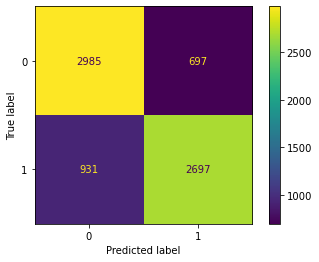

In [100]:
best_RF = RandomForestClassifier(max_depth = 50, n_estimators = 20)
best_RF.fit(train_scaled, Y_train)
RF_predict = best_RF.predict(test_scaled)
RF_confusion = confusion_matrix(Y_test, RF_predict)
disp = ConfusionMatrixDisplay(RF_confusion)
disp.plot()
plt.show()

In [98]:
# GBC:
GBC = GradientBoostingClassifier()
param_grid = {'n_estimators': [5, 10, 20, 100],
              'learning_rate': [ 0.01, 0.1, 1, 1.2]}
grid = GridSearchCV(GBC,param_grid,verbose=4, scoring = "f1")
grid.fit(train_scaled,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.01, n_estimators=5;, score=0.703 total time=   0.4s
[CV 2/5] END learning_rate=0.01, n_estimators=5;, score=0.715 total time=   0.3s
[CV 3/5] END learning_rate=0.01, n_estimators=5;, score=0.710 total time=   0.3s
[CV 4/5] END learning_rate=0.01, n_estimators=5;, score=0.708 total time=   0.3s
[CV 5/5] END learning_rate=0.01, n_estimators=5;, score=0.700 total time=   0.3s
[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=0.703 total time=   0.7s
[CV 2/5] END learning_rate=0.01, n_estimators=10;, score=0.715 total time=   0.7s
[CV 3/5] END learning_rate=0.01, n_estimators=10;, score=0.710 total time=   0.7s
[CV 4/5] END learning_rate=0.01, n_estimators=10;, score=0.708 total time=   0.6s
[CV 5/5] END learning_rate=0.01, n_estimators=10;, score=0.700 total time=   0.6s
[CV 1/5] END learning_rate=0.01, n_estimators=20;, score=0.703 total time=   1.3s
[CV 2/5] END learning_rate=0.01, n_estimat

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 1.2],
                         'n_estimators': [5, 10, 20, 100]},
             scoring='f1', verbose=4)

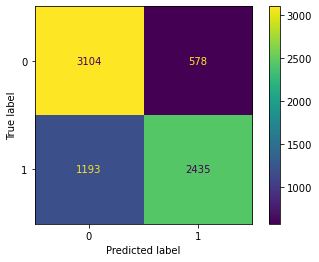

In [99]:
best_GBC = GradientBoostingClassifier(learning_rate = 1, n_estimators = 100)
best_GBC.fit(train_scaled, Y_train)
GBC_predict = best_GBC.predict(test_scaled)
GBC_confusion = confusion_matrix(Y_test, GBC_predict)
disp = ConfusionMatrixDisplay(GBC_confusion)
disp.plot()
plt.show()

# Saving Models for Deployment:

In [104]:
import joblib

In [105]:
# Best Model Was RF
RF_model = 'RF_model.sav'
joblib.dump(best_RF, RF_model)
#Testin the saved_model
loaded_model = joblib.load(RF_model)
loaded_model.predict(test_scaled)

In [107]:
#Saving MinMaxScaler:
minmax = 'minmax.sav'
joblib.dump(min_max, minmax)

['minmax.sav']

In [108]:
test = joblib.load(minmax)

In [109]:
test.transform(X_test)

array([[0.01818182, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03636364, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01818182, 0.14285714, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.01818182, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05454545, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [111]:
# Saving category encoder:
ce = "encoder.sav"
joblib.dump(ce_binary, ce)

['encoder.sav']

In [113]:
enc = joblib.load(ce)

In [114]:
enc

BinaryEncoder(cols=['job', 'marital', 'contact', 'age_level'])

In [117]:
# enc.transform(X[["job", "marital", "contact", "age_level"]])